In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import vrpSolver

## Use `geoJSON` to create road network

In this notebook, we are going to use local `geoJSON` file to 
- Create road network
- Display road network
- Randomly sample customers locations on road network/residential area

### 0. Preparation

To use `geoJSON` functions, we need to download the `geoJSON` files. Typically, we can get`geoJSON` file from OpenStreetMap website.
Ref: https://wiki.openstreetmap.org/wiki/Downloading_data

In this demo, we are using a `geoJSON` file of Buffalo, NY, U.S. (Jan. 20, 2022)

In [2]:
cityName = 'Buffalo'

In [3]:
geoJSONPath = "../data/%s.geojson" % cityName

### 1. Read highways fron `geoJSON` file
catergorize by motorway, country level roads, residential streets

In [4]:
network = vrpSolver.createRoadNetworkFromGeoJSON(
    geoJSONPath = geoJSONPath,
    boundaryLatLon = [
        [42.84, -78.9], 
        [42.95, -78.9], 
        [42.95, -78.8],
        [42.84, -78.8],
        [42.84, -78.9]])

### 2. Randomly (uniformly) create customers on residential roads

#### 2.1 Inside a polygon

In [5]:
poly = [[42.92, -78.84], [42.92, -78.88], [42.90, -78.88], [42.89, -78.85]]
customers = vrpSolver.rndPlainNodes(
    N = 50,
    distr = "uniformRoadNetworkPoly",
    distrArgs = {
        'road': network['road'],
        'poly': poly,
        'class': ['residential']
    })

In [6]:
fig, ax = vrpSolver.plotRoadNetwork(
    roadNetwork = network,
    figSize = [10, 14])
# Plot the customer locations on map in black
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = customers,
    color = 'black',
    xyReverseFlag = True)
# Plot the polygon where customers are created
fig, ax = vrpSolver.plotPolygon(
    fig = fig, 
    ax = ax,
    poly = poly,
    xyReverseFlag = True,
    edgeColor = 'blue')

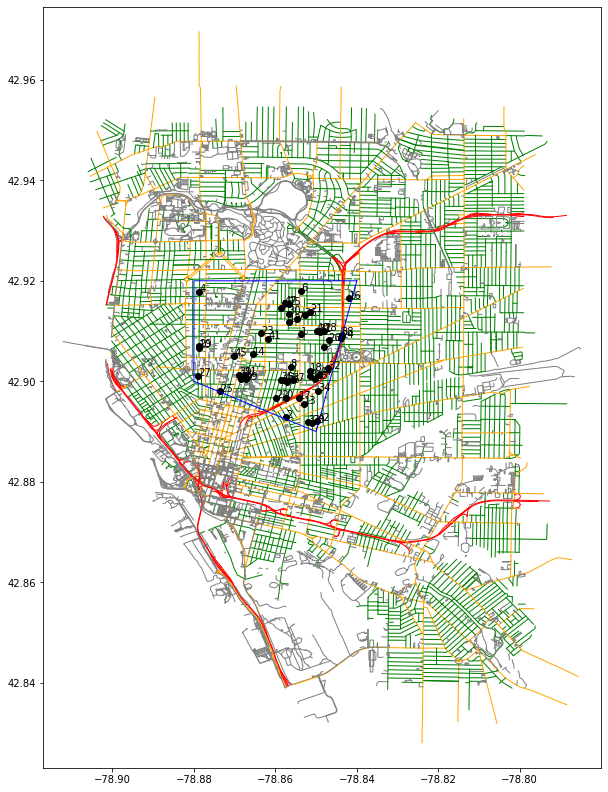

In [7]:
fig

#### 2.2 Inside a circle

In [8]:
centerLoc = [42.88, -78.84]
radius = 2000
customers = vrpSolver.rndPlainNodes(
    N = 50,
    distr = "uniformRoadNetworkCircle",
    distrArgs = {
        'road': network['road'],
        'centerLoc': centerLoc,
        'radius': radius
    })

In [9]:
fig, ax = vrpSolver.plotRoadNetwork(
    roadNetwork = network,
    figSize = [10, 15]
)
# Plot the customer locations on map in black
fig, ax = vrpSolver.plotNodes(
    fig = fig,
    ax = ax,
    nodes = customers,
    color = 'black',
    xyReverseFlag = True)
fig
# Plot polygon
poly = []
for i in range(36):
    poly.append(vrpSolver.ptInDistLatLon(centerLoc, i * 10, radius))
fig, ax = vrpSolver.plotPolygon(
    fig = fig, 
    ax = ax,
    poly = poly,
    xyReverseFlag = True,
    edgeColor = 'blue')

In [11]:
vrpSolver.plotRoadNetwork?